In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime

In [52]:
df = pd.read_csv(r"D:\Git\aa_project\Data\frankfurt_final.csv")
df_w = pd.read_csv(r"D:\Git\aa_project\Data\frankfurt_weather.csv")

In [53]:
df_w.head()

,Unnamed: 0,sid,datetime,temperature,precipitation,wind_speed
0,0,1420,2019-02-01 00:00:00,-0.3,0.0,2.5
1,1,1420,2019-02-01 01:00:00,-0.1,0.0,2.4
2,2,1420,2019-02-01 02:00:00,-0.3,0.2,1.7
3,3,1420,2019-02-01 03:00:00,-0.3,0.7,1.6
4,4,1420,2019-02-01 04:00:00,0.0,0.0,2.1


In [54]:
df.head()

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng
0,0,2019-06-25 21:51:00,2019,6,25,21,51,2,Tuesday,11420,frankfurt,7,0.715,49.991072,8.412515,49.984942,8.409474
1,1,2019-06-26 06:33:00,2019,6,26,6,33,3,Wednesday,11420,frankfurt,14,1.087,49.984942,8.409474,49.985673,8.424641
2,2,2019-06-27 13:20:00,2019,6,27,13,20,4,Thursday,11420,frankfurt,7,0.010,49.985613,8.424448,49.985538,8.424533
3,3,2019-06-27 13:30:00,2019,6,27,13,30,4,Thursday,11420,frankfurt,4,0.018,49.985528,8.424512,49.985679,8.424603
4,4,2019-06-27 13:59:00,2019,6,27,13,59,4,Thursday,11420,frankfurt,9,0.005,49.985679,8.424603,49.985636,8.424570


In [55]:
type(df_w["datetime"][0])

str

In [56]:
df_w.datetime = pd.to_datetime(df_w.datetime)

In [57]:
type(df_w["datetime"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [58]:
len(df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 2)].index)

0

In [59]:
def get_trips(datetime):
    return len(df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)].index)

In [60]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

In [61]:
df_w.head()

,Unnamed: 0,sid,datetime,temperature,precipitation,wind_speed,num_trips
0,0,1420,2019-02-01 00:00:00,-0.3,0.0,2.5,0
1,1,1420,2019-02-01 01:00:00,-0.1,0.0,2.4,1
2,2,1420,2019-02-01 02:00:00,-0.3,0.2,1.7,0
3,3,1420,2019-02-01 03:00:00,-0.3,0.7,1.6,1
4,4,1420,2019-02-01 04:00:00,0.0,0.0,2.1,0


In [62]:
def get_distance(datetime):
    sum = 0
    df_distance = df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)]
    for distance in df_distance["distance"]:
        sum = sum + distance
    return sum

In [63]:
sum = 0
df_distance = df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 1)]
for distance in df_distance["distance"]:
    sum = sum + distance
print(sum)

1.8880000000000001


In [64]:
df_w["distance"] = df_w["datetime"].apply(get_distance)

In [65]:
def get_duration(datetime):
    sum = 0
    df_duration = df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)]
    for duration in df_duration["trip_duration"]:
        sum = sum + duration
    return sum

In [66]:
df_w["duration"] = df_w["datetime"].apply(get_duration)

In [67]:
df_w.drop(columns = ["Unnamed: 0", "sid"], inplace = True)

In [68]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)
df_w

,datetime,temperature,precipitation,wind_speed,num_trips,distance,duration
0,2019-02-01 00:00:00,-0.3,0.0,2.5,0,0.000,0
1,2019-02-01 01:00:00,-0.1,0.0,2.4,1,1.888,12
2,2019-02-01 02:00:00,-0.3,0.2,1.7,0,0.000,0
3,2019-02-01 03:00:00,-0.3,0.7,1.6,1,0.744,8
4,2019-02-01 04:00:00,0.0,0.0,2.1,0,0.000,0
5,2019-02-01 05:00:00,0.0,0.0,1.3,1,3.769,21
6,2019-02-01 06:00:00,0.2,0.0,1.7,1,3.018,19
7,2019-02-01 07:00:00,0.5,0.0,1.3,4,5.463,58
8,2019-02-01 08:00:00,0.8,0.0,2.3,4,5.421,72
9,2019-02-01 09:00:00,1.5,0.0,2.1,2,2.297,23


In [69]:
df_distance = df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 1)]
df_distance

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng
6342,6342,2019-02-01 01:28:00,2019,2,1,1,28,5,Friday,38222,frankfurt,12,1.888,50.114352,8.649958,50.131105,8.645661


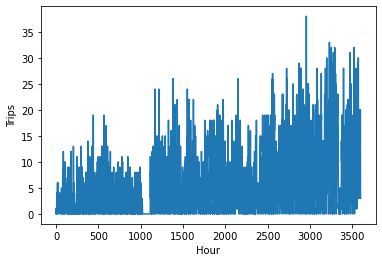

In [70]:
data_w = pd.DataFrame()
data_w['num_trips'] = df_w.num_trips.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.num_trips, label='Trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.show()

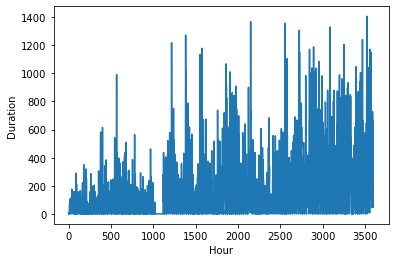

In [ ]:
data_w = pd.DataFrame()
data_w['duration'] = df_w.duration
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.duration, label='Trips per hour')
plt.ylabel('Duration')
plt.xlabel('Hour')
plt.show()

In [ ]:
data_w = pd.DataFrame()
data_w['distance'] = df_w.distance
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.distance, label='Trips per hour')
plt.ylabel('Distance')
plt.xlabel('Hour')
plt.show()

In [ ]:
df_w.head(100)

In [ ]:
df_w.to_csv(r"D:\Git\aa_project\Data\frankfurt_kpi.csv")